# Display Quit and Retirement

Create a Rectbin Graph to display the Transition Matrix due to Quit and Retirement

### Input Variables:

$\mathbf{\Pi}_Q$ Quit and Retirement Transition Matrix  

$C$ Array with Colours used in Rectbin Graph

### Output Variables:

$\text{Rect}$ Rectbin Graph with Transition Matrix

## Function:

In [1]:
function QnR(Π::SparseMatrixCSC{Float64,Int64};colour=["white","gray","black"])
    
    """Create a Rectbin Graph to 
    display the Transition Matrix 
    due to Quit and Retirement

    Parameters
    ----------
    Π : Quit and Retirement Transition Matrix
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Rect: Rectbin Graph with Transition Matrix

    """
    
    L=size(Π,1);
    
    Li=[1:L];

    Lt=[0:10:L-1];

    x=repeat(Li,inner=[L])
    y=repeat(Li,outer=[L])

    Rect=plot(x=x, y=y, color=Π[:],
    Scale.ContinuousColorScale(Scale.lab_gradient(color(colour[1]),color(colour[2]),color(colour[3]))),
    Guide.ylabel("L Today"),
    Guide.xlabel("L Tomorrow"),
    Guide.title("Transition Matrix"),
    Guide.colorkey("Probability"),
    Guide.xticks(ticks=Lt),
    Guide.yticks(ticks=Lt),
    Geom.rectbin)
    
    return Rect
    
end

QnR (generic function with 1 method)

## Example

### Parameters:

In [2]:
import LabourDP

# QnR Parameters

δ=0.1;
γ=0.5;

# Create Labour Portfolio
G=3;
N=3;

M_D=9.;
F_G=1.;

N_G=ceil(Int,M_D/F_G);

# Create Labour Function
fPortfolio=LabourDP.fPort(G);

Labour=LabourDP.LabourPortfolio(G,N,N_G,fPortfolio);

QnRFeas=LabourDP.FeasibleQnR(fPortfolio,Labour);

QnRT=LabourDP.QnRTransition(Labour,QnRFeas,δ,γ);

#### Rectbin Graph:

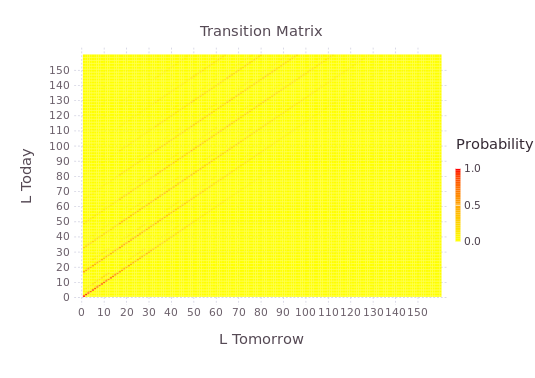

In [4]:
using Gadfly
using Color

QnR(QnRT,colour=["yellow","orange","red"])